In [1]:
styl = String(read("style.css"))
HTML("$styl")

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\r\n\r\n<style>\r\n\r\n@font-face {\r\n    font-family: \"Computer Modern\";\r\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\r\n}\r\n\r\n\r\n\r\n/* Formatting for header cells */\r\n.text_cell_render h1 {\r\n    font-family: 'Philosopher', sans-serif;\r\n    font-weight: 400;\r\n    font-size: 2.7em;\r\n    line-height: 100%;\r\n    color: rgb(160, 20 80);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n.text_cell_render h2 {\r\n    font-family: 'Philosopher', serif;\r\n    font-weight: 400;\r\n    font-size: 2.1em;\r\n    line-height: 100%;\r\n    color: rgb(200,100,0);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n\r\n.text_cell_render h3 {\r\n    font-family: 'Philosopher', serif;\r\n    margin-top:12px;\r\n    margin-bottom: 3px;\r\n    font-size: 1.6em;\r\n    font-style: italic;\r\n    color: rgb(94,127,192);\r\n}\r\n\r\n.text_cell_render h4 {\r\n    font-family: 'Philosopher', serif;\r\n}\r\n\r\n.text_cell_render h5 {\r\n    font-family: 'Alegreya Sans', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 16pt;\r\n    color: grey;\r\n    font-style: italic;\r\n    margin-bottom: .1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\r\n\r\n.text_cell_render h6 {\r\n    font-family: 'PT Mono', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 10pt;\r\n    color: grey;\r\n    margin-bottom: 1px;\r\n    margin-top: 1px;\r\n}\r\n\r\n.CodeMirror{\r\n        font-family: \"PT Mono\";\r\n        font-size: 100%;\r\n}\r\n\r\nbody, p, li {\r\n    font-size: 1.3em;\r\n  }\r\n</style>\r\n\r\n")

In [2]:
using Printf, Statistics
using OpenCL, PyPlot, BenchmarkTools, StatsBase

---

# OpenCL

![](Images/OCL-Splash.png)

---

---

## Some Array Processors I have struggled with :

![](Images/array-processors.png)

---

---

![](Images/OCL-Timeline.png)

---

---

![](Images/OCL-Foundation.png)

---


## Some Benchmarks <br/>

* FFT   :	Fast Fourier Transform <br/><br/><br/>

* MD    : Molecular Dynanmics <br/><br/><br/>

* SGEMM : α\*[A]\*[B] + β\*[C] <br/><br/>

![](Images/Benchmarks-C1060.png)

---

---

## Features of CUDA vs OpenCL:<br/>

* Toolsets <br/><br/><br/>

* Libraries <br/><br/><br/>

* (_Heterogeneous_) Programming <br/><br/><br/>

* Performance <br/><br/><br/>

* Bang-For-Buck <br/>

---


## CUDA has support for templates, and a wealth of libraries:<br/>

* cuFFT    – Fast Fourier Transforms Library <br/><br/>
* cuBLAS   – Complete BLAS Library <br/><br/>
* cuSPARSE – Sparse Matrix Library <br/><br/>
* cuRAND   – Random Number Generation (RNG) Library <br/><br/>
* cuDNN    - Deep Neural Network library <br/><br/>
* NPP      – Performance Primitives for Image & Video Processing <br/><br/>
* Thrust   – Templated Parallel Algorithms & Data Structures <br/><br/>

---


In [3]:
# Check on the number of OCL devices
using OpenCL
devices = cl.devices()

3-element Array{OpenCL.cl.Device,1}:
 OpenCL.Device(Intel(R) HD Graphics 620 on Intel(R) OpenCL @0x0000000023d8e250)                
 OpenCL.Device(Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz on Intel(R) OpenCL @0x000000001d4521c0)
 OpenCL.Device(GeForce MX150 on NVIDIA CUDA @0x0000000023da0900)                               

In [4]:
const ND = length(devices)

3

In [3]:
oclfile = pathof(OpenCL)

"C:\\Users\\malco\\.julia\\packages\\OpenCL\\vsBez\\src\\OpenCL.jl"

In [4]:
run(`head -14 $oclfile`)

module OpenCL

export cl
module cl

abstract type CLObject end

Base.hash(x::CLObject) = hash(pointer(x))
Base.isequal(x :: T, y :: T) where {T <: CLObject} = Base.hash(x) == Base.hash(y)
Base.:(==)(x :: T, y :: T) where {T <: CLObject} = Base.hash(x) == Base.hash(y)

# OpenCL Types
include("types.jl")



Process(`head -14 'C:\Users\malco\.julia\packages\OpenCL\vsBez\src\OpenCL.jl'`, ProcessExited(0))

In [5]:
oclsrc  = oclfile[1:end-10]

run(`ls -F $oclsrc`)

OpenCL.jl
api/
api.jl
array.jl
buffer.jl
constants.jl
context.jl
device.jl
error.jl
event.jl
kernel.jl
kernels/
macros.jl
memory.jl
platform.jl
program.jl
queue.jl
types.jl
util.jl


Process(`ls -F 'C:\Users\malco\.julia\packages\OpenCL\vsBez\src'`, ProcessExited(0))

---

### Mad computation

In [7]:
const mad2_kernel_src = """
__kernel void mad2(__global const float *a,
                   __global const float *b,
                   __global const float *c,
                   __global float *d)
{
  int gid = get_global_id(0);
  d[gid] = a[gid]*b[gid] + c[gid];
}
""";


---

![](Images/OCL-MemoryModel.png)

---


In [8]:
a = randn(Float32, 100_000)
b = randn(Float32, 100_000)
c = randn(Float32, 100_000)
;

In [9]:
device, ctx, queue = cl.create_compute_context()
@printf "Device  : %s\nContext : %s\nQueue   : %s" device ctx queue

Device  : OpenCL.Device(Intel(R) HD Graphics 620 on Intel(R) OpenCL @0x0000000023d8e250)
Context : OpenCL.Context(@0x0000000023da42e0 on Intel(R) HD Graphics 620)
Queue   : OpenCL.CmdQueue(@0x0000000026ea07c0)


---

![](Images/OCL-Context.png)

---


In [10]:
# default device returned is the first GPU

first(cl.devices(:gpu))

OpenCL.Device(Intel(R) HD Graphics 620 on Intel(R) OpenCL @0x0000000023d8e250)

In [11]:
# create opencl buffer objects
# copies to the device initiated when the kernel function is called

a_buff = cl.Buffer(Float32, ctx, (:r, :copy), hostbuf=a)
b_buff = cl.Buffer(Float32, ctx, (:r, :copy), hostbuf=b)
c_buff = cl.Buffer(Float32, ctx, (:r, :copy), hostbuf=c)
d_buff = cl.Buffer(Float32, ctx, :w, length(a))
;

In [12]:
# build the program 
p = cl.Program(ctx, source=mad2_kernel_src) |> cl.build!

OpenCL.Program(@0x0000000026ea0700)

In [13]:
# construct a kernel object
mad2_kernel = cl.Kernel(p, "mad2")

OpenCL.Kernel("mad2" nargs=4)

In [14]:
# call the kernel object with global size 
# set to the size our arrays
mad2_kernel[queue, size(a)](a_buff, b_buff, c_buff, d_buff)

OpenCL.Event(@0x00000000275ea510)

In [15]:
# perform a blocking read of the result from the device
r = cl.read(queue, d_buff);

In [16]:
# check to see if our result is what we expect!
[mean(r), std(r), skewness(r), kurtosis(r)]

4-element Array{Float64,1}:
 -0.0036519253626465797
  1.4125667810440063   
  0.04322536735037751  
  1.5306015500615677   

In [17]:
describe(r)

Summary Stats:
Length:         100000
Missing Count:  0
Mean:           -0.003652
Minimum:        -12.112815
1st Quartile:   -0.871394
Median:         -0.002928
3rd Quartile:   0.850893
Maximum:        10.668225
Type:           Float32


---

In [ ]:
run(`less ./RNGkernel.cl`);

---

---

### Mandelbrot Set


![](Images/MBrot-Alg.jpg)


In [18]:
mandel_source = """
    __kernel void mandelbrot(__global float2 *q,
                             __global ushort *output, 
                             ushort const maxiter)
{
  int gid = get_global_id(0);
  float nreal, real = 0;
  float imag = 0;
  output[gid] = 0;
  for(int curiter = 0; curiter < maxiter; curiter++) {
    nreal = real*real - imag*imag + q[gid].x;
    imag = 2*real*imag + q[gid].y;
    real = nreal;
    if (real*real + imag*imag > 4.0f)
      output[gid] = curiter;
  }
}""";

In [19]:
w = 4096 * 2;
h = 4096 * 2;
@printf("Size %i MB\n", sizeof(ComplexF32) * w * h / 1024 / 1024)

Size 512 MB


In [20]:
## q = [ComplexF32(r,i) for i=1:-(2.0/w):-1, r=-1.5:(3.0/h):1.5];

function build_q(w, h)
  y1 = -1.0
  y2 = 1.0
  x1 = -1.5
  x2 = 0.5
  q = Array{ComplexF32}(undef, h, w)
  for x in 1:w
    for y in 1:h
      xx = x1 + x * ((x2 - x1) / w)
      yy = y1 + y * ((y2 - y1) / h)
      @inbounds q[y, x] = ComplexF32(xx, yy)
    end
  end
  return q
end

q = build_q(w, h);

In [21]:
function mandel_opencl(q::Array{ComplexF32}, maxiter::Int64, device)
  ctx   = cl.Context(device)
  queue = cl.CmdQueue(ctx)
  out = Array{UInt16}(undef,size(q))
  q_buff = cl.Buffer(ComplexF32, ctx, (:r, :copy), hostbuf=q)
  o_buff = cl.Buffer(UInt16, ctx, :w, length(out))
  prg = cl.Program(ctx, source=mandel_source) |> cl.build!
  k = cl.Kernel(prg, "mandelbrot")
  queue(k, length(q), nothing, q_buff, o_buff, UInt16(maxiter))
  cl.copy!(queue, out, o_buff)
  return out
end

mandel_opencl (generic function with 1 method)

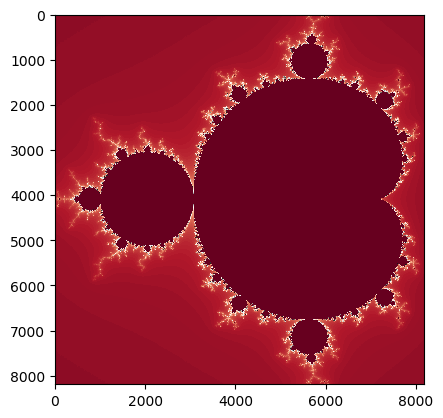

PyObject <matplotlib.image.AxesImage object at 0x0000000001F8E048>

In [22]:
m = mandel_opencl(q, 150, device)
imshow(m, cmap="RdGy")

---

### OpenCL Arrays 

In [23]:
import OpenCL.cl.CLArray
## device, ctx, queue = cl.create_compute_context()

In [24]:
using LinearAlgebra

@time begin
    A = CLArray(queue, rand(Float32, 256, 128))
    B = cl.zeros(Float32, queue, 128, 256)
    ev = transpose!(B, A)
    cl.wait(ev)
end

  1.358857 seconds (3.04 M allocations: 152.820 MiB, 3.18% gc time)


OpenCL.Event(@0x0000000001603bf0)

In [25]:
A

CLArray{Float32,2}(Buffer{Float32}(@0x0000000027586fb0),(256, 128))

In [26]:
aa = cl.to_host(A);
aa[1,2]

0.7141974f0

In [27]:
bb = cl.to_host(B);
bb[2,1]

0.7141974f0

In [28]:
aa' == bb

true

---

### Quadrature for PI


$$ \int_0^1 \frac{1}{(1 + {x}^2)} = atan(1) = \frac{\pi}{4} $$


In [29]:
const INSTEPS = 512*512*512
const ITERS = 262144

in_nsteps = INSTEPS
niters    = ITERS

262144

In [30]:
kernel = """
//------------------------------------------------------------------------------
//
// kernel:  pi
//
// Purpose: accumulate partial sums of pi comp
//
// input:  float step_size
//         int   niters per work item
//         local float* an array to hold sums from each work item
//
// output: partial_sums -- float vector of partial sums
//

void reduce(
   __local  float*,
   __global float*);

__kernel void pi(
   const int          niters,
   const float        step_size,
   __local  float*    local_sums,
   __global float*    partial_sums)
{
   int num_wrk_items  = get_local_size(0);
   int local_id       = get_local_id(0);
   int group_id       = get_group_id(0);

   float x, accum = 0.0f;
   int i,istart,iend;

   istart = (group_id * num_wrk_items + local_id) * niters;
   iend   = istart+niters;

   for(i= istart; i<iend; i++){
       x = (i+0.5f)*step_size;
       accum += 4.0f/(1.0f+x*x);
   }

   local_sums[local_id] = accum;
   barrier(CLK_LOCAL_MEM_FENCE);
   reduce(local_sums, partial_sums);
}

//------------------------------------------------------------------------------
//
// OpenCL function:  reduction
//
// Purpose: reduce across all the work-items in a work-group
//
// input : local  float*  an array to hold sums from each work item
// output: global float*  partial_sums  [float vector]
//

void reduce(
   __local  float*    local_sums,
   __global float*    partial_sums)
{
   int num_wrk_items  = get_local_size(0);
   int local_id       = get_local_id(0);
   int group_id       = get_group_id(0);

   float sum;
   int i;

   if (local_id == 0) {
      sum = 0.0f;
      for (i=0; i<num_wrk_items; i++) {
          sum += local_sums[i];
      }
      partial_sums[group_id] = sum;
   }
}
""";

In [31]:
pi_prog = cl.Program(ctx, source = kernel) |> cl.build!
pi_kernel = cl.Kernel(pi_prog, "pi")

OpenCL.Kernel("pi" nargs=4)

In [32]:
work_group_size = device[:max_work_group_size]
nwork_groups = in_nsteps ÷ (work_group_size * niters)

if nwork_groups < 1
    nwork_groups = device[:max_compute_units]
    work_group_size = in_nsteps ÷ (nwork_groups * niters)
end

nsteps = work_group_size * niters * nwork_groups
step_size = 1.0 / nsteps

h_psum = Vector{Float32}(undef,nwork_groups)

println("$nwork_groups workgroup(s) of size $work_group_size.")
println("$nsteps integration steps")

2 workgroup(s) of size 256.
134217728 integration steps


In [33]:
d_partial_sums = cl.Buffer(Float32, ctx, :w, length(h_psum))

rtime = time()
global_size = (nwork_groups * work_group_size,)
local_size  = (work_group_size,)
localmem    = cl.LocalMem(Float32, work_group_size)

queue(pi_kernel, global_size, local_size, Int32(niters), Float32(step_size), localmem, d_partial_sums)
cl.copy!(queue, h_psum, d_partial_sums)

pi_res = round(sum(h_psum)*step_size, digits=6)
rtime = round(time() - rtime, digits=4)

println("The computation took $rtime secs")
println("pi = $pi_res for $nsteps steps")

The computation took 0.263 secs
pi = 3.141887 for 134217728 steps


---

### GEMM _(using CLBlas)_

![](Images/gemm.jpg)

---

In [34]:
using OpenCL, CLBlast, LinearAlgebra
const LA = LinearAlgebra

LinearAlgebra

In [35]:
# setup data
α = 1.f0
β = 1.f0
A = rand(Float32, 10, 8)
B = rand(Float32, 8, 6)
C = zeros(Float32, 10, 6);

In [36]:
# transfer data
A_cl = cl.CLArray(queue, A)
B_cl = cl.CLArray(queue, B)
C_cl = cl.CLArray(queue, C);

In [37]:
# Compute using the CPU
LA.BLAS.gemm!('N', 'N', α, A, B, β, C)

10×6 Array{Float32,2}:
 1.88328  1.96899  2.42393  1.8941   2.04754  2.26641
 2.42044  2.62085  2.12947  3.42559  3.11455  2.78798
 2.68105  2.97756  2.99134  3.30782  3.29237  3.2018 
 2.16455  2.71301  2.31006  2.92303  3.05688  2.26567
 1.61822  1.9682   1.72626  2.08339  2.32394  1.975  
 2.45535  2.55055  2.23538  2.36037  2.69352  2.44526
 2.08302  2.01242  1.87466  2.39313  2.64337  2.39672
 2.09283  2.33489  2.0446   3.01436  2.21614  2.49407
 2.03062  2.45888  2.44744  2.76596  2.58339  2.50613
 2.29338  2.15419  1.72304  3.02513  2.468    2.35438

In [38]:
# Compute using the GPU
CLBlast.gemm!('N', 'N', α, A_cl, B_cl, β, C_cl)

# Result is returned in C_cl
D = cl.to_host(C_cl)

10×6 Array{Float32,2}:
 1.88328  1.96899  2.42393  1.8941   2.04754  2.26641
 2.42044  2.62085  2.12947  3.42559  3.11455  2.78798
 2.68105  2.97756  2.99134  3.30782  3.29237  3.2018 
 2.16455  2.71301  2.31006  2.92303  3.05688  2.26567
 1.61822  1.9682   1.72626  2.08339  2.32394  1.975  
 2.45535  2.55055  2.23538  2.36037  2.69352  2.44526
 2.08302  2.01242  1.87466  2.39313  2.64337  2.39672
 2.09283  2.33489  2.0446   3.01436  2.21614  2.49407
 2.03062  2.45888  2.44744  2.76596  2.58339  2.50613
 2.29338  2.15419  1.72304  3.02513  2.468    2.35438

In [39]:
C == D

true

---

### Compare GPU devices

In [40]:
ctxs = [cl.Context(devices[i]) for i = 1:ND]

3-element Array{OpenCL.cl.Context,1}:
 OpenCL.Context(@0x00000000275f4a90 on Intel(R) HD Graphics 620)                
 OpenCL.Context(@0x000000002733b450 on Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz)
 OpenCL.Context(@0x0000000000fcc4f0 on GeForce MX150)                           

In [41]:
const mad3_kernel = "
__kernel void mad3(
                    __global const float *a,
                    __global const float *b,
                    __global const float *x,
                    __global const float *y,
                    __global const float *z,
                    __global float *s)
    {
      int gid = get_global_id(0);
      s[gid] = a[gid]*x[gid]*x[gid] + b[gid]*y[gid] + z[gid];
    }
";

In [42]:
queues = [cl.CmdQueue(ctxs[i]) for i = 1:ND]
progs  = [cl.Program(ctxs[i], source=mad3_kernel) |> cl.build! for i = 1:ND]

ets = zeros(ND)
kerns  = [cl.Kernel(progs[i], "mad3") for i = 1:ND]

for n in (1, 10^3, 3*10^3, 10^4, 3*10^4, 10^5, 3*10^5, 10^6, 3*10^6, 10^7)
  
  a = rand(Float32, n);
  b = rand(Float32, n);
  x = rand(Float32, n);
  y = rand(Float32, n);
  z = rand(Float32, n);
  ## s = Array{Float32}(undef, n);

  for i = 1:ND
        
    a_buff = cl.Buffer(Float32, ctxs[i], (:r, :copy), hostbuf=a);
    b_buff = cl.Buffer(Float32, ctxs[i], (:r, :copy), hostbuf=b);
    x_buff = cl.Buffer(Float32, ctxs[i], (:r, :copy), hostbuf=x);
    y_buff = cl.Buffer(Float32, ctxs[i], (:r, :copy), hostbuf=y);
    z_buff = cl.Buffer(Float32, ctxs[i], (:r, :copy), hostbuf=z);
    s_buff = cl.Buffer(Float32, ctxs[i], :w, n)

    ets[i] = @elapsed begin
      kerns[i][queues[i], size(x)](a_buff, b_buff, x_buff, y_buff, z_buff, s_buff);
    end
  end
        
  if n == 1
    @printf "    Size   Intel HD620   NVidia MX150\n"
  else
    @printf "%8d   %9.5f     %9.5f\n" n ets[1] ets[3]
  end
end


    Size   Intel HD620   NVidia MX150
    1000     0.00097       0.00092
    3000     0.00094       0.00102
   10000     0.00086       0.00098
   30000     0.00089       0.00123
  100000     0.00132       0.00254
  300000     0.00171       0.00617
 1000000     0.00333       0.01523
 3000000     0.00774       0.04149
10000000     0.02136       0.12540


---

### Mandelbrot _(revisited)_ 

In [43]:
using BenchmarkTools

In [44]:
device = devices[1]
@benchmark mandel_opencl(q, 150, device) samples=5

BenchmarkTools.Trial: 
  memory estimate:  128.01 MiB
  allocs estimate:  159
  --------------
  minimum time:     1.041 s (0.06% GC)
  median time:      1.203 s (1.16% GC)
  mean time:        1.180 s (1.96% GC)
  maximum time:     1.256 s (6.50% GC)
  --------------
  samples:          5
  evals/sample:     1

In [45]:
device = devices[2]
@benchmark mandel_opencl(q, 150, device) samples=5

BenchmarkTools.Trial: 
  memory estimate:  128.01 MiB
  allocs estimate:  159
  --------------
  minimum time:     2.095 s (0.02% GC)
  median time:      2.358 s (0.03% GC)
  mean time:        2.334 s (0.21% GC)
  maximum time:     2.550 s (0.54% GC)
  --------------
  samples:          3
  evals/sample:     1

In [46]:
device = devices[3]
@benchmark mandel_opencl(q, 150, device) samples=5

BenchmarkTools.Trial: 
  memory estimate:  128.01 MiB
  allocs estimate:  159
  --------------
  minimum time:     1.104 s (0.04% GC)
  median time:      1.160 s (0.93% GC)
  mean time:        1.153 s (2.01% GC)
  maximum time:     1.203 s (7.33% GC)
  --------------
  samples:          5
  evals/sample:     1

---

---

![](Images/Khronos-promoters.jpg)

---

---

![](Images/khronos-timeline.png)

---

---

![](Images/AQs.jpg)
![](Images/underwhelmed.png)

---